In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [24]:
data = loadmat("/mnt/c/Users/ankku/Documents/IITB Lectures and Study Material/Sem6/CS736/assignmentShapeAnalysis/data/robustShapeMean2D.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar 26 22:25:33 2025',
 '__version__': '1.0',
 '__globals__': [],
 'pointsets': array([[[-2.66084801e-02,  1.47844478e-01],
         [-5.24813160e-02,  2.00896099e-01],
         [-3.75411212e-02,  2.57437348e-01],
         ...,
         [-1.57932341e-02,  5.11685610e-02],
         [-6.77787699e-04,  8.15860704e-02],
         [-3.38983536e-02,  1.14079028e-01]],
 
        [[ 1.54035434e-01,  5.31125516e-02],
         [ 1.49812520e-01,  7.27405846e-02],
         [ 1.36321813e-01,  1.33722588e-01],
         ...,
         [ 9.95843709e-02, -7.83168525e-02],
         [ 1.12487704e-01, -3.06523181e-02],
         [ 1.48918912e-01,  3.19962623e-03]],
 
        [[ 2.28680804e-01, -7.70823509e-02],
         [ 2.15486780e-01, -3.93461883e-02],
         [ 2.21604288e-01, -8.05603527e-03],
         ...,
         [ 1.70250520e-01, -1.66400611e-01],
         [ 1.99369535e-01, -1.54175282e-01],
         [ 2.25973561e-01, -1.07652232

In [25]:
pointsets = data['pointsets']
print(pointsets.shape)
pointsets

(357, 32, 2)


array([[[-2.66084801e-02,  1.47844478e-01],
        [-5.24813160e-02,  2.00896099e-01],
        [-3.75411212e-02,  2.57437348e-01],
        ...,
        [-1.57932341e-02,  5.11685610e-02],
        [-6.77787699e-04,  8.15860704e-02],
        [-3.38983536e-02,  1.14079028e-01]],

       [[ 1.54035434e-01,  5.31125516e-02],
        [ 1.49812520e-01,  7.27405846e-02],
        [ 1.36321813e-01,  1.33722588e-01],
        ...,
        [ 9.95843709e-02, -7.83168525e-02],
        [ 1.12487704e-01, -3.06523181e-02],
        [ 1.48918912e-01,  3.19962623e-03]],

       [[ 2.28680804e-01, -7.70823509e-02],
        [ 2.15486780e-01, -3.93461883e-02],
        [ 2.21604288e-01, -8.05603527e-03],
        ...,
        [ 1.70250520e-01, -1.66400611e-01],
        [ 1.99369535e-01, -1.54175282e-01],
        [ 2.25973561e-01, -1.07652232e-01]],

       ...,

       [[-7.31362131e+00, -5.24159185e+00],
        [-6.50997786e+00, -4.44351994e+00],
        [-5.76457717e+00, -5.26267691e+00],
        ...,
     

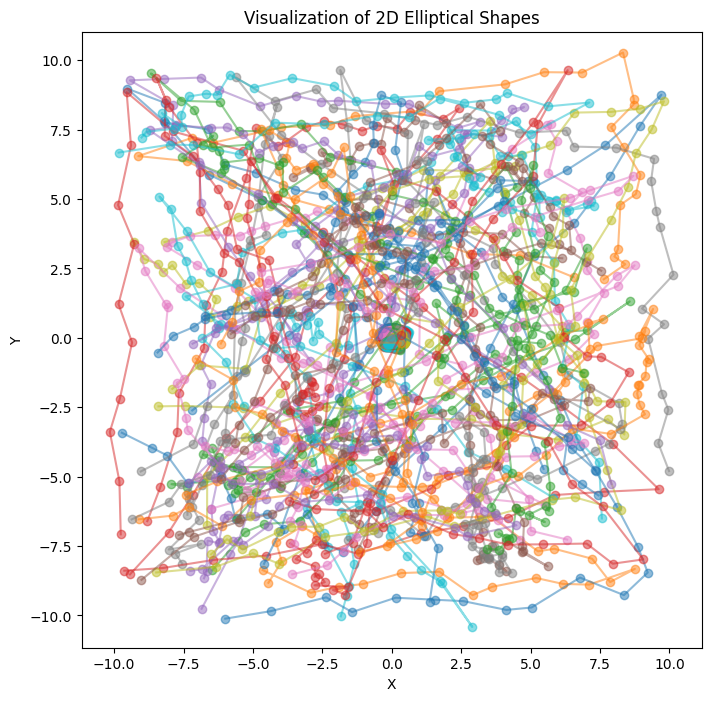

In [ ]:
plt.figure(figsize=(8, 8))
M = pointsets.shape[0]
for m in range(M):
    shape = pointsets[m]  # shape: (N,2) 
    plt.plot(shape[:, 0], shape[:, 1], 'o-', alpha=0.5)  

plt.title('Visualization of 2D Elliptical Shapes')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

In [ ]:
def center_and_normalize(X):
    X_centered = X - np.mean(X, axis=0)
    norm = np.linalg.norm(X_centered, 'fro')
    return X_centered / norm

In [ ]:
def optimal_alignment(X, Z):
    A = X.T @ Z
    U, _, Vt = np.linalg.svd(A)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[-1,:] *= -1
        R = Vt.T @ U.T
    s = np.trace(R.T @ A)  # equivalent to inner product <Z, X R>
    return s, R

In [ ]:
def compute_mean_shape_squared(pointsets, max_iter=100, tol=1e-6):
    M = pointsets.shape[0]
    N = pointsets.shape[1]
    
    shapes = np.array([center_and_normalize(pointsets[m]) for m in range(M)])
    
    Z = shapes[0].copy()
    
    for it in range(max_iter):
        aligned_shapes = []
        for m in range(M):
            X = shapes[m]
            s, R = optimal_alignment(X, Z)
            aligned = s * (X @ R)
            aligned_shapes.append(aligned)
        aligned_shapes = np.array(aligned_shapes)
        
        Z_new = np.mean(aligned_shapes, axis=0)
        Z_new = center_and_normalize(Z_new)
        
        if np.linalg.norm(Z_new - Z, 'fro') < tol:
            break
        Z = Z_new
        
    return Z, shapes, aligned_shapes

In [30]:
mean_shape_sq, shapes, aligned_shapes_sq = compute_mean_shape_squared(pointsets)

(np.float64(-0.36220999613025173),
 np.float64(0.37871062825772667),
 np.float64(-0.3729325482918848),
 np.float64(0.3947800704584691))

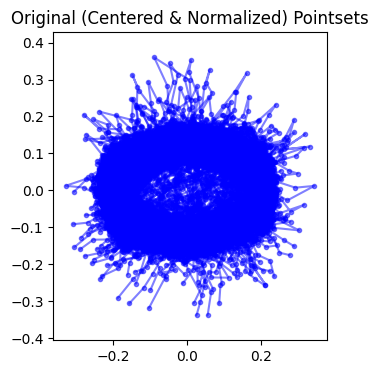

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
for s in shapes:
    plt.plot(s[:, 0], s[:, 1], 'b.-', alpha=0.5)
plt.title('Original (Centered & Normalized) Pointsets')
plt.axis('equal')

(np.float64(-0.23739025282317683),
 np.float64(0.24495753984822585),
 np.float64(-0.13956437563849078),
 np.float64(0.129127205467391))

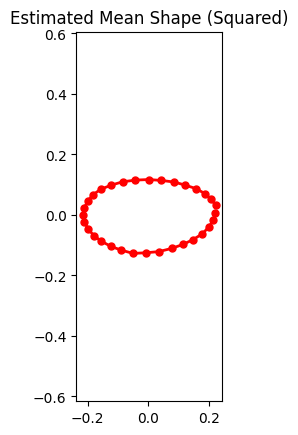

In [32]:
plt.subplot(1, 3, 2)
plt.plot(mean_shape_sq[:, 0], mean_shape_sq[:, 1], 'r.-', linewidth=2, markersize=10)
plt.title('Estimated Mean Shape (Squared)')
plt.axis('equal')

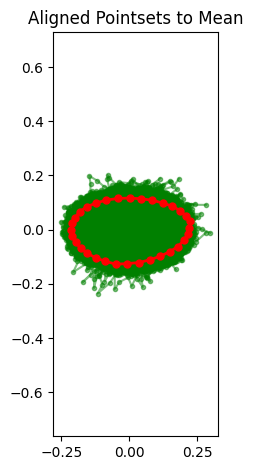

In [33]:
plt.subplot(1, 3, 3)
for s in aligned_shapes_sq:
    plt.plot(s[:, 0], s[:, 1], 'g.-', alpha=0.5)
plt.plot(mean_shape_sq[:, 0], mean_shape_sq[:, 1], 'r.-', linewidth=2, markersize=10)
plt.title('Aligned Pointsets to Mean')
plt.axis('equal')

plt.tight_layout()
plt.show()

(b)

In [ ]:
def compute_mean_shape_l1(pointsets, max_iter=100, tol=1e-6, epsilon=1e-8):
    M = pointsets.shape[0]
    N = pointsets.shape[1]
    
    shapes = np.array([center_and_normalize(pointsets[m]) for m in range(M)])
    
    Z = shapes[0].copy()
    
    for it in range(max_iter):
        aligned_shapes = []
        distances = []
        for m in range(M):
            X = shapes[m]
            s, R = optimal_alignment(X, Z)
            aligned = s * (X @ R)
            aligned_shapes.append(aligned)
            d = np.linalg.norm(Z - aligned, 'fro')
            distances.append(d)
        aligned_shapes = np.array(aligned_shapes)
        distances = np.array(distances)
        
        weights = 1.0 / (epsilon + distances)
        
        Z_new = np.sum(weights[:, None, None] * aligned_shapes, axis=0) / np.sum(weights)
        Z_new = center_and_normalize(Z_new)
        
        if np.linalg.norm(Z_new - Z, 'fro') < tol:
            break
        Z = Z_new
        
    return Z, shapes, aligned_shapes

In [35]:
mean_shape_l1, shapes, aligned_shapes_l1 = compute_mean_shape_l1(pointsets)

(np.float64(-0.36220999613025173),
 np.float64(0.37871062825772667),
 np.float64(-0.3729325482918848),
 np.float64(0.3947800704584691))

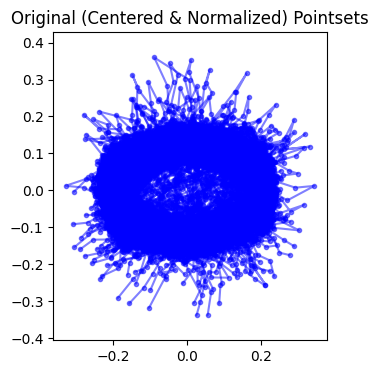

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
for s in shapes:
    plt.plot(s[:, 0], s[:, 1], 'b.-', alpha=0.5)
plt.title('Original (Centered & Normalized) Pointsets')
plt.axis('equal')

(np.float64(-0.24230887257950312),
 np.float64(0.24345875049973797),
 np.float64(-0.12930434626392234),
 np.float64(0.1256538227357672))

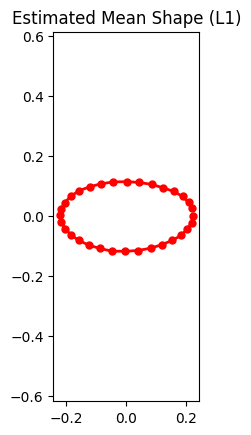

In [37]:
plt.subplot(1, 3, 2)
plt.plot(mean_shape_l1[:, 0], mean_shape_l1[:, 1], 'r.-', linewidth=2, markersize=10)
plt.title('Estimated Mean Shape (L1)')
plt.axis('equal')

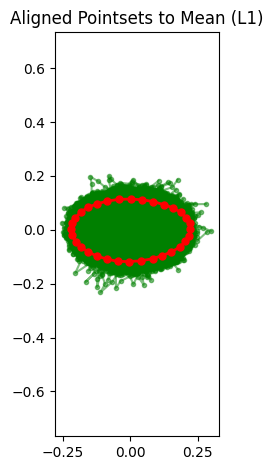

In [38]:
plt.subplot(1, 3, 3)
for s in aligned_shapes_l1:
    plt.plot(s[:, 0], s[:, 1], 'g.-', alpha=0.5)
plt.plot(mean_shape_l1[:, 0], mean_shape_l1[:, 1], 'r.-', linewidth=2, markersize=10)
plt.title('Aligned Pointsets to Mean (L1)')
plt.axis('equal')

plt.tight_layout()
plt.show()